Dataset Preview:
         Date Region  Temperature (°C)  Humidity (%)  Precipitation (mm)  \
0  2024-09-01      A         32.002442     67.356240            5.055540   
1  2024-09-01      B         20.336674     58.895462            6.238861   
2  2024-09-01      C         31.742379     75.376416            7.448676   
3  2024-09-01      D         30.658498     74.034748            0.365499   
4  2024-09-01      E         30.532112     71.131556            8.024733   

   Wind Speed (km/h) Weather Condition  
0          19.786599             Clear  
1           8.493006            Cloudy  
2           6.891930            Cloudy  
3          15.103829            Cloudy  
4          17.839396             Rainy  

Model Evaluation:
Accuracy: 0.3
Confusion Matrix:
 [[3 2 7]
 [4 1 4]
 [1 3 5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.25      0.30        12
           1       0.17      0.11      0.13         9
           2 

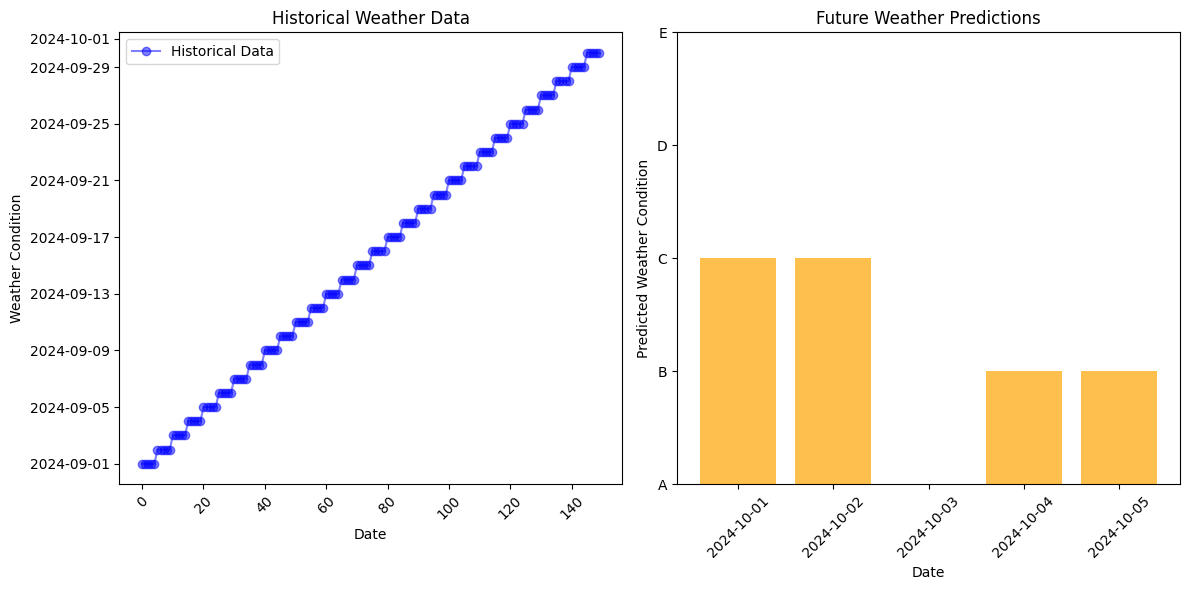

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
file_path = r"C:\Users\ASUS\Downloads\weather.csv"
data = pd.read_csv(file_path)

# Preview the dataset
print("Dataset Preview:")
print(data.head())

# Preprocess the data
# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Encode the categorical 'Weather Condition'
label_encoder = LabelEncoder()
data['Weather Condition'] = label_encoder.fit_transform(data['Weather Condition'])

# Encode the categorical 'Region'
data['Region'] = label_encoder.fit_transform(data['Region'])

# Create features and target variable
X = data.drop(['Date', 'Weather Condition'], axis=1)  # Features
y = data['Weather Condition']  # Target variable

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Make predictions for the next few days
last_row = data.iloc[-1]  # Get the last row of the dataset for prediction
future_dates = pd.date_range(start=last_row['Date'] + pd.Timedelta(days=1), periods=5, freq='D')
future_predictions = []

for date in future_dates:
    new_row = last_row.copy()
    new_row['Date'] = date  # Update the date
    new_row['Temperature (°C)'] = np.random.uniform(20, 35)
    new_row['Humidity (%)'] = np.random.uniform(50, 80)
    new_row['Precipitation (mm)'] = np.random.uniform(0, 10)
    new_row['Wind Speed (km/h)'] = np.random.uniform(5, 20)
    future_predictions.append(new_row)

# Create a DataFrame for future predictions
future_df = pd.DataFrame(future_predictions)

# Preprocess the future data
future_X = future_df.drop(['Date', 'Weather Condition'], axis=1)
future_X_scaled = scaler.transform(future_X)

# Predict future weather conditions
future_weather_predictions = model.predict(future_X_scaled)
future_weather_labels = label_encoder.inverse_transform(future_weather_predictions)

# Combine future dates with predictions
future_results = pd.DataFrame({
    'Date': future_dates,
    'Predicted Weather Condition': future_weather_labels
})

print("\nFuture Weather Predictions:")
print(future_results)

# Plotting the predictions
plt.figure(figsize=(12, 6))

# Plot the historical data
plt.subplot(1, 2, 1)
plt.plot(data['Date'], label='Historical Data', marker='o', color='blue', alpha=0.5)
plt.title('Historical Weather Data')
plt.xlabel('Date')
plt.ylabel('Weather Condition')
plt.xticks(rotation=45)
plt.legend()

# Plot the future predictions
plt.subplot(1, 2, 2)
plt.bar(future_results['Date'].astype(str), future_weather_predictions, color='orange', alpha=0.7)
plt.title('Future Weather Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Weather Condition')
plt.xticks(rotation=45)
plt.yticks(ticks=np.arange(len(label_encoder.classes_)), labels=label_encoder.classes_)

plt.tight_layout()
plt.show()